decision tree classification

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv("data.csv")
data

,Income_Thousand,CIBIL_Score,Existing_Loan,Employment_Type,Age,Loan_Amount_Lakh,Loan_Status
0,71,757,Yes,Salaried,27,21,Approved
1,112,680,No,Business,28,17,Approved
2,34,701,No,Salaried,35,23,Approved
3,91,603,Yes,Business,49,5,Rejected
4,80,669,Yes,Salaried,53,22,Approved
...,...,...,...,...,...,...,...
295,51,619,Yes,Salaried,36,14,Rejected
296,28,801,Yes,Salaried,44,2,Approved
297,118,824,No,Business,39,4,Approved
298,38,731,No,Business,28,17,Approved


In [33]:
data["Existing_Loan"] = data["Existing_Loan"].map({"Yes":1,"No":0})
data["Employment_Type"] = data["Employment_Type"].map({"Salaried":1,"Business":0})
data["Loan_Status"] = data["Loan_Status"].map({"Approved":1,"Rejected":0})
data

,Income_Thousand,CIBIL_Score,Existing_Loan,Employment_Type,Age,Loan_Amount_Lakh,Loan_Status
0,71,757,1,1,27,21,1
1,112,680,0,0,28,17,1
2,34,701,0,1,35,23,1
3,91,603,1,0,49,5,0
4,80,669,1,1,53,22,1
...,...,...,...,...,...,...,...
295,51,619,1,1,36,14,0
296,28,801,1,1,44,2,1
297,118,824,0,0,39,4,1
298,38,731,0,0,28,17,1


In [34]:
X = data.drop("Loan_Status",axis=1)
y = data["Loan_Status"]

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [38]:
y_predict =model.predict(x_test)
print("accu",accuracy_score(y_test,y_predict))

accu 0.8166666666666667


In [39]:
new_cut = pd.DataFrame({
    'Income_Thousand': [70, 100, 30],
    'CIBIL_Score': [700, 780, 620],
    'Existing_Loan': [1, 0, 1],
    'Employment_Type': [1, 0, 1],
    'Age': [30, 45, 25],
    'Loan_Amount_Lakh': [15, 20, 10]
})


In [40]:
model.predict(new_cut)

array([1, 1, 1])

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,15))


<Figure size 8000x1500 with 0 Axes>

<Figure size 8000x1500 with 0 Axes>

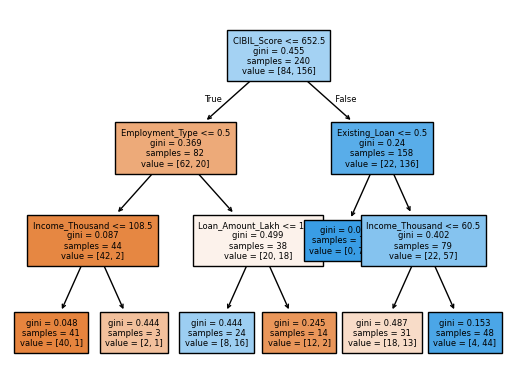

In [42]:
plot_tree(model,filled=True,feature_names=X.columns,fontsize=6)
plt.show()

In [43]:
y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict) # Correct! Uses Decision Tree predictions



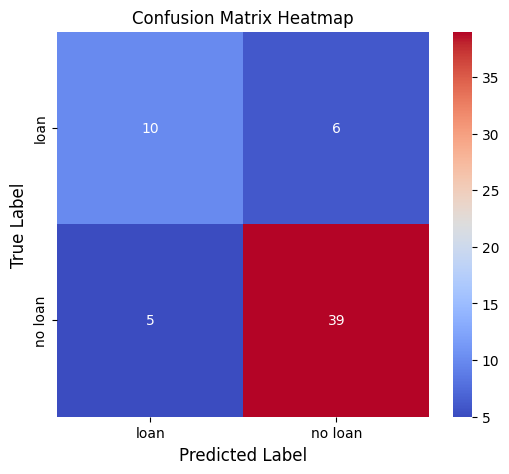

In [44]:
cm = confusion_matrix(y_test, y_predict)
class_names = ["loan", "no loan"]
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",              # shows integer values
    cmap="coolwarm",
    cbar=True,
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

Random forest classifier 

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
rf = RandomForestClassifier(n_estimators=100,max_depth=4,min_samples_split=5,random_state=42)

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_split=5, random_state=42)

In [49]:
y_pred = rf.predict(x_test)

In [50]:
print("Accureacy = ",accuracy_score(y_test,y_pred))

Accureacy =  0.9


<BarContainer object of 6 artists>

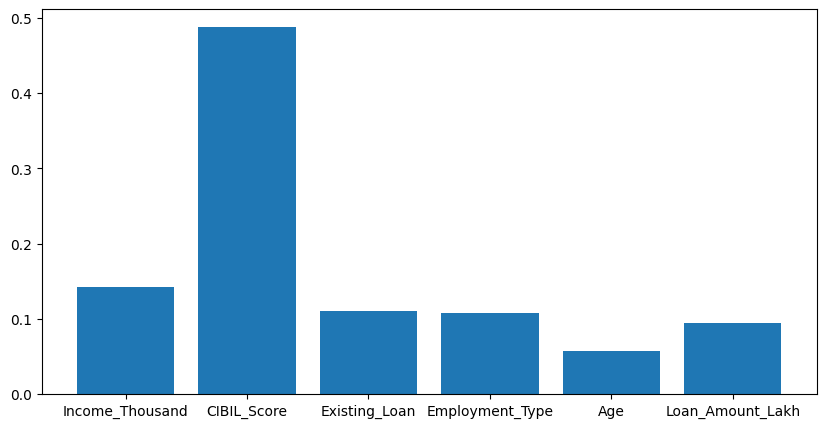

In [51]:
importance = rf.feature_importances_
plt.figure(figsize=(10,5))
plt.bar(X.columns,importance)      

In [52]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)


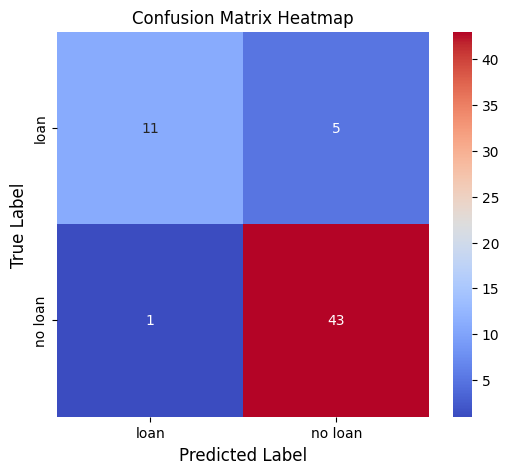

In [53]:
cm = confusion_matrix(y_test, y_pred)
class_names = ["loan", "no loan"]
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",              # shows integer values
    cmap="coolwarm",
    cbar=True,
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb = XGBClassifier(n_estimators=100,max_depth=4,learning_rate=0.1,random_state=42)

In [56]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [57]:
xgb_pred = xgb.predict(x_test)

In [58]:
print("acc",accuracy_score(y_test,xgb_pred))

acc 0.9333333333333333


In [59]:
y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, xgb_pred)

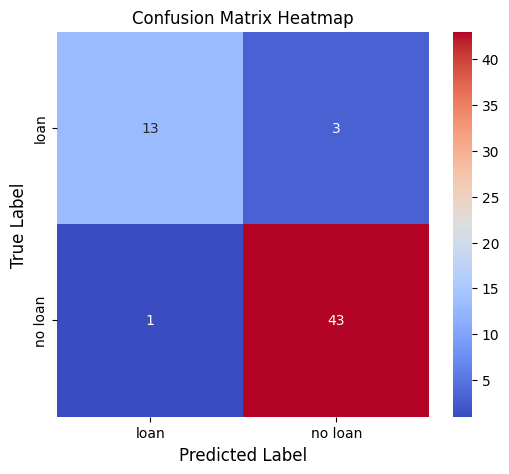

In [60]:
cm = confusion_matrix(y_test, xgb_pred)
class_names = ["loan", "no loan"]
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",              # shows integer values
    cmap="coolwarm",
    cbar=True,
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()